# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [7]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#import scipy.stats as st
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn import datasets

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 588


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
#url = https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
# Example for LOndon as a city 
# http://api.openweathermap.org/data/2.5/weather?&q=London&appid=8bf978e78fe21190cd2614137b60ebf5

url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
# query_url = url  + "&appid=" + weather_api_key + "&units=metric" + "&q=" + city 
#print(query_url)
    
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = url  + "&q=" + city + "&appid=" + weather_api_key 
    query_url = url  + "&appid=" + weather_api_key + "&units=metric" + "&q=" + city 
    # print(query_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # new/another version of above using f' print(f'Processing Record {record_count} of set {set_count} | {city}')
    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()  # YOUR CODE HERE get request with city_url

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat'] # YOUR CODE HERE
        city_lng = city_weather['coord']['lon'] # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max'] # YOUR CODE HERE
        city_humidity =  city_weather['main']['humidity'] # YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind = city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country'] # YOUR CODE HERE
        city_date = city_weather['dt']  # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | scarborough
Processing Record 2 of Set 1 | yanam
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | lolua
City not found. Skipping...
Processing Record 6 of Set 1 | malwan
City not found. Skipping...
Processing Record 7 of Set 1 | bredasdorp
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | mikhaylovka
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | bluff
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | dawson
Processing Record 21

Processing Record 38 of Set 4 | kabare
Processing Record 39 of Set 4 | mar del plata
Processing Record 40 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 4 | cairns
Processing Record 42 of Set 4 | constitucion
Processing Record 43 of Set 4 | khatanga
Processing Record 44 of Set 4 | turukhansk
Processing Record 45 of Set 4 | aljezur
Processing Record 46 of Set 4 | novobiryusinskiy
Processing Record 47 of Set 4 | eureka
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | gao
Processing Record 0 of Set 5 | jojoima
Processing Record 1 of Set 5 | otradnoye
Processing Record 2 of Set 5 | sao joao da barra
Processing Record 3 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 4 of Set 5 | berlin
Processing Record 5 of Set 5 | novoseleznevo
Processing Record 6 of Set 5 | qasigiannguit
Processing Record 7 of Set 5 | villa carlos paz
Processing Record 8 of Set 5 | erzin
Processing Record 9 of Set 5 | chokurdakh
P

Processing Record 27 of Set 8 | sivaki
Processing Record 28 of Set 8 | meyungs
City not found. Skipping...
Processing Record 29 of Set 8 | deputatskiy
Processing Record 30 of Set 8 | bima
Processing Record 31 of Set 8 | antigonish
Processing Record 32 of Set 8 | iralaya
Processing Record 33 of Set 8 | sidmouth
Processing Record 34 of Set 8 | egvekinot
Processing Record 35 of Set 8 | gimli
Processing Record 36 of Set 8 | mabaruma
Processing Record 37 of Set 8 | santa cruz
Processing Record 38 of Set 8 | ambilobe
Processing Record 39 of Set 8 | yerbogachen
Processing Record 40 of Set 8 | colomi
Processing Record 41 of Set 8 | anadyr
Processing Record 42 of Set 8 | batagay
Processing Record 43 of Set 8 | vanimo
Processing Record 44 of Set 8 | champerico
Processing Record 45 of Set 8 | susanville
Processing Record 46 of Set 8 | svetlogorsk
Processing Record 47 of Set 8 | kloulklubed
Processing Record 48 of Set 8 | fairbanks
Processing Record 49 of Set 8 | konongo
Processing Record 0 of Set

Processing Record 16 of Set 12 | maumere
Processing Record 17 of Set 12 | ormara
Processing Record 18 of Set 12 | necochea
Processing Record 19 of Set 12 | shimoda
Processing Record 20 of Set 12 | senanga
Processing Record 21 of Set 12 | maniago
Processing Record 22 of Set 12 | port hardy
Processing Record 23 of Set 12 | poum
Processing Record 24 of Set 12 | husavik
Processing Record 25 of Set 12 | tidore
City not found. Skipping...
Processing Record 26 of Set 12 | drumheller
Processing Record 27 of Set 12 | santo estevao
Processing Record 28 of Set 12 | kollam
Processing Record 29 of Set 12 | andevoranto
City not found. Skipping...
Processing Record 30 of Set 12 | pacifica
Processing Record 31 of Set 12 | parabel
Processing Record 32 of Set 12 | ayan
Processing Record 33 of Set 12 | sungai besar
Processing Record 34 of Set 12 | thunder bay
Processing Record 35 of Set 12 | majene
Processing Record 36 of Set 12 | juneau
Processing Record 37 of Set 12 | mbandaka
-------------------------

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
print(city_data_df.count())
print(len(city_data))

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64
545


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,scarborough,54.2797,-0.4044,11.30,87,100,2.68,GB,1681677796
1,yanam,16.7333,82.2167,24.79,85,23,1.39,IN,1681677816
2,kapaa,22.0752,-159.3190,26.99,80,100,3.09,US,1681677816
3,bredasdorp,-34.5322,20.0403,13.99,86,0,1.28,ZA,1681677817
4,mataura,-46.1927,168.8643,11.38,68,14,1.26,NZ,1681677817


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,scarborough,54.2797,-0.4044,11.30,87,100,2.68,GB,1681677796
1,yanam,16.7333,82.2167,24.79,85,23,1.39,IN,1681677816
2,kapaa,22.0752,-159.3190,26.99,80,100,3.09,US,1681677816
3,bredasdorp,-34.5322,20.0403,13.99,86,0,1.28,ZA,1681677817
4,mataura,-46.1927,168.8643,11.38,68,14,1.26,NZ,1681677817


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

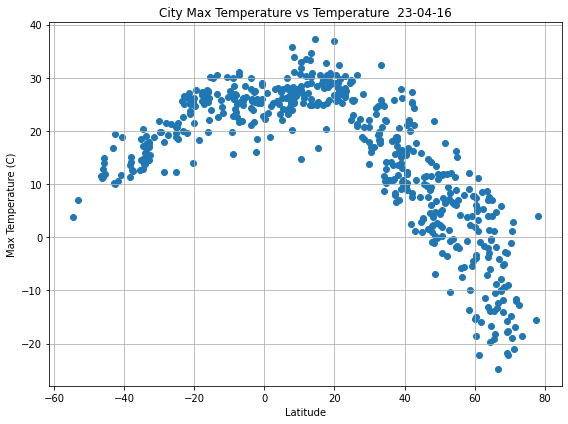

In [15]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])
plt.title("Latitude Vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Convert Unix timestamp to struct_time object
timestamp = city_data_df['Date'][0]
time_struct = time.gmtime(timestamp)

# Extract year, month, and day from struct_time object
year = time.strftime("%y", time_struct)
month = time.strftime("%m", time_struct)
day = time.strftime("%d", time_struct)

# Format as YY-MM-DD
formatted_date = f"{year}-{month}-{day}"
title = 'City Max Temperature vs Temperature  ' + formatted_date

plt.grid()
plt.title(title)
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [10]:
my_date = pd.to_datetime(city_data_df['Date'][0],unit=None)
print(my_date)

1970-01-01 00:00:01.681673836


#### Latitude Vs. Humidity

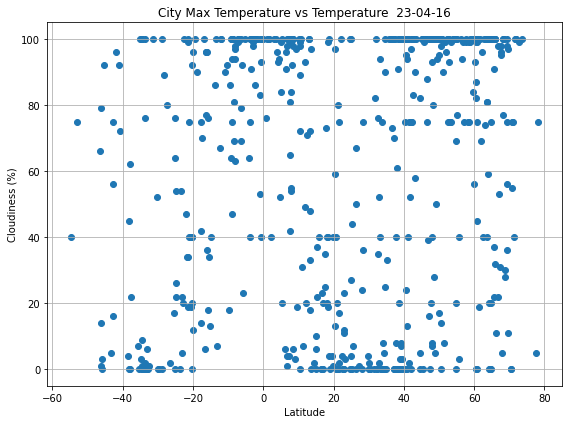

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])
plt.title("Latitude Vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Convert Unix timestamp to struct_time object
timestamp = city_data_df['Date'][0]
time_struct = time.gmtime(timestamp)

# Extract year, month, and day from struct_time object
year = time.strftime("%y", time_struct)
month = time.strftime("%m", time_struct)
day = time.strftime("%d", time_struct)

# Format as YY-MM-DD
formatted_date = f"{year}-{month}-{day}"
title = 'City Max Temperature vs Temperature  ' + formatted_date

plt.grid()
plt.title(title)
plt.tight_layout()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

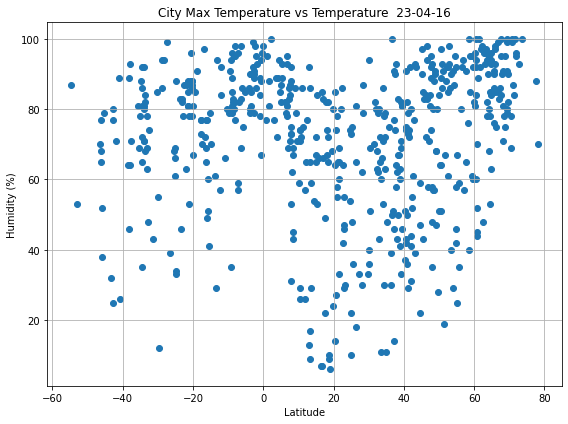

In [17]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])
plt.title("Latitude Vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Convert Unix timestamp to struct_time object
timestamp = city_data_df['Date'][0]
time_struct = time.gmtime(timestamp)

# Extract year, month, and day from struct_time object
year = time.strftime("%y", time_struct)
month = time.strftime("%m", time_struct)
day = time.strftime("%d", time_struct)

# Format as YY-MM-DD
formatted_date = f"{year}-{month}-{day}"
title = 'City Max Temperature vs Temperature  ' + formatted_date

plt.grid()
plt.title(title)
plt.tight_layout()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

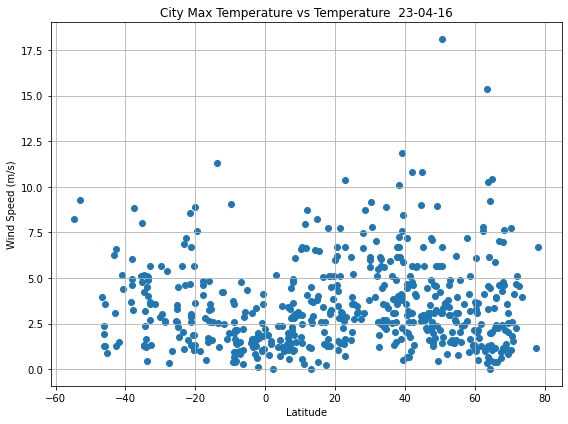

In [18]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

plt.figure(figsize=(8, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])
plt.title("Latitude Vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Convert Unix timestamp to struct_time object
timestamp = city_data_df['Date'][0]
time_struct = time.gmtime(timestamp)

# Extract year, month, and day from struct_time object
year = time.strftime("%y", time_struct)
month = time.strftime("%m", time_struct)
day = time.strftime("%d", time_struct)

# Format as YY-MM-DD
formatted_date = f"{year}-{month}-{day}"
title = 'City Max Temperature vs Temperature  ' + formatted_date
plt.grid()
plt.title(title)
plt.tight_layout()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def lin_reg_plot(data_df, x_axis, y_axis,coord_txt1,coord_txt2): 
    """
    Create a linear regression plot.

    Args:
        data_df (pd.DataFrame): The input dataframe.
        x_col (str): The name of the column representing the x-axis.
        y_col (str): The name of the column representing the y-axis.
        coord_txt1,coord_txt2 are where to print the equation
    Returns:
        None
    """
    y_values = data_df[y_axis]
    x_values = data_df[x_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(coord_txt1,coord_txt2),fontsize=15,color="red")
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    r2value = str(rvalue*rvalue)
    print(f"The r-squared-value is: {r2value}")
    plt.show()
    


In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,scarborough,54.2797,-0.4044,11.30,87,100,2.68,GB,1681677796
1,yanam,16.7333,82.2167,24.79,85,23,1.39,IN,1681677816
2,kapaa,22.0752,-159.3190,26.99,80,100,3.09,US,1681677816
5,jamestown,42.0970,-79.2353,25.29,41,75,5.66,US,1681677817
8,albany,42.6001,-73.9662,24.24,61,83,1.34,US,1681677818


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,bredasdorp,-34.5322,20.0403,13.99,86,0,1.28,ZA,1681677817
4,mataura,-46.1927,168.8643,11.38,68,14,1.26,NZ,1681677817
6,punta arenas,-53.1500,-70.9167,7.06,53,75,9.26,CL,1681677817
7,avarua,-21.2078,-159.7750,25.03,53,40,2.57,CK,1681677818
10,cabedelo,-6.9811,-34.8339,25.37,82,100,4.81,BR,1681677687


###  Temperature vs. Latitude Linear Regression Plot

The r-squared-value is: 0.7606631153972181


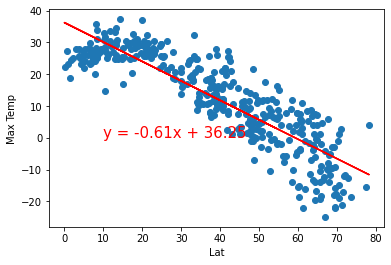

In [22]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_col ='Lat'
y_col = 'Max Temp'
df = northern_hemi_df

lin_reg_plot(df, x_col, y_col,10,0)


The r-squared-value is: 0.6364148213289327


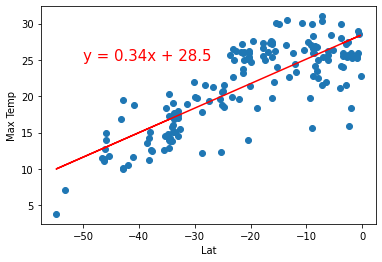

In [23]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_col ='Lat'
y_col = 'Max Temp'
df = southern_hemi_df

lin_reg_plot(df, x_col, y_col,-50,25)



**Discussion about the linear relationship:** YOUR RESPONSE HERE
The r-value is 0.63 (above 0.5) suggests a strong positive correlation between the latitude and max temperature in the southern hemisphere. The same conculusion can be made for the northern hemisphere with a negative correlation and r-value being .73.

### Humidity vs. Latitude Linear Regression Plot

The r-squared-value is: 0.07974494535998125


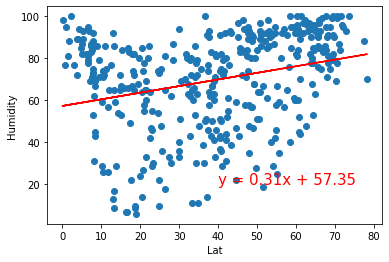

In [24]:
# Northern Hemisphere
# YOUR CODE HERE

x_col ='Lat'
y_col = 'Humidity'
df = northern_hemi_df

lin_reg_plot(df, x_col, y_col,40,20)

The r-squared-value is: 0.1271927695036194


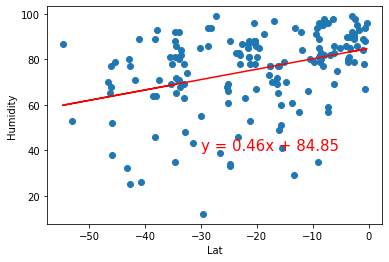

In [25]:
# Southern Hemisphere
# YOUR CODE HERE

x_col ='Lat'
y_col = 'Humidity'
df = southern_hemi_df

lin_reg_plot(df, x_col, y_col,-30,40)


**Discussion about the linear relationship:** YOUR RESPONSE HERE
In both cases the r-squared-value is between .1 & .3 indicating a suggests a weak positive (or negative) correlation between the Humidity and Latitude. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared-value is: 0.028791306939261643


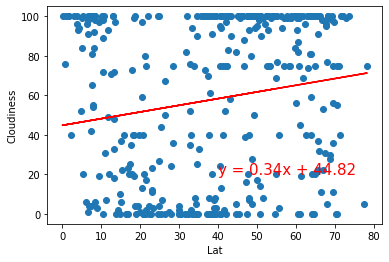

In [26]:
# Northern Hemisphere
# YOUR CODE HERE

x_col ='Lat'
y_col = 'Cloudiness'
df = northern_hemi_df

lin_reg_plot(df, x_col, y_col,40,20)

The r-squared-value is: 0.26068204148662555


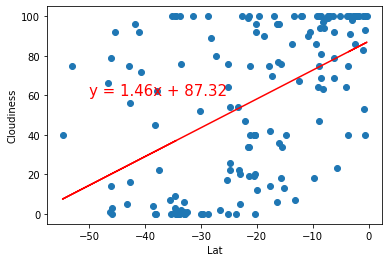

In [27]:
# Southern Hemisphere
# YOUR CODE HERE
x_col ='Lat'
y_col = 'Cloudiness'
df = southern_hemi_df

lin_reg_plot(df, x_col, y_col,-50,60)

**Discussion about the linear relationship:** YOUR RESPONSE HERE
Given the r-squared value 0.26 & 0.34 there seem to be a weak or no correlation between Cloudiness ansd Latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared-value is: 0.0010423135304693896


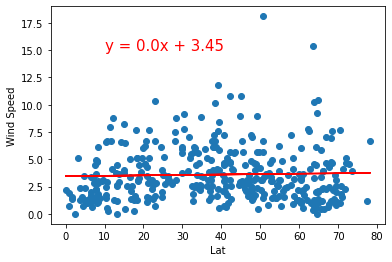

In [28]:
# Northern Hemisphere
# YOUR CODE HERE
x_col ='Lat'
y_col = 'Wind Speed'
df = northern_hemi_df

lin_reg_plot(df, x_col, y_col,10,15)

The r-squared-value is: 0.12431090468970266


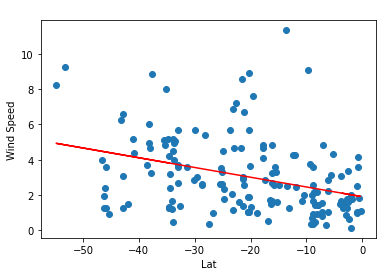

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_col ='Lat'
y_col = 'Wind Speed'
df = southern_hemi_df

lin_reg_plot(df, x_col, y_col,-30,12)


**Discussion about the linear relationship:** YOUR RESPONSE HERE
For northern hemisphere the r-squared value is amost zero suggesting no correlation between Latitude and wind speed.  For the southern hemisphere the r-squared is slighly higher but it is still hard to conclude there is any correlation between the 2 variables 